# Cursul 5

## Vectori și valori proprii

Să ne întoarcem la modelul considerat în cursul 3: $$\mathbf{x}_{t+1}=P\mathbf{x}_t, P = \left(\begin{array}{cc}  0,9925 & 0,0125 \\ 0,0075 & 0,9875 \end{array}\right).$$ Echilibrul obținut prin iterații este $\mathbf{v}_1=(625,375)$. Dacă înmulțim $P$ cu $\mathbf{v}_1$ bținem $P\mathbf{v}_1=\mathbf{v}_1$. Mai există un vector $\mathbf{v}_2=(1,-1)$ cu un comportament asemănător $P\mathbf{v}_2=0,98\mathbf{v}_2$. 

In [5]:
using LinearAlgebra
P = [0.9925 0.0125;0.0075 0.9875]
v1 = [625;375]
v2 = [1;-1]
display(P*v1)
display(P*v2)

2-element Vector{Float64}:
 625.0
 375.0

2-element Vector{Float64}:
  0.9800000000000001
 -0.9800000000000001

**Definiție:** Un vector $\mathbf{v} \in \mathbb{R}$, diferit de $0$, se numește vector propriu al matricei $A \in M_n(\mathbb{R})$ dacă există un scalar $\lambda$ cu proprietatea că $A\mathbf{v}=\lambda \mathbf{v}$.

Deci $P$ are vectorul propriu $(625,375)$ corespunzător valorii proprii $1$ și vectorul propriu $(1,-1)$ corespunzător valorii proprii $0,98$. Se poate vedea că nu numai $(625,375)$, dar și $(5,3)$, $(10,6)$, $(-15,-9)$ sînt vectori proprii corespunzători lui $1$. Dar toți acești vectori sînt multiplii scalari între
ei. Avem 

**Propoziție:** Dacă un vector $\mathbf{v}$ este vector propriu pentru o matrice $A$, corespunzător valorii proprii $\lambda$, atunci $c\mathbf{v}$ este de asemenea vector propriu corespunzător lui $\lambda$.

Pentru a înțelege sistemele liniare este foarte important să cunoaștem vectorii proprii ai matricei de proiecție. Să vedem de ce:

Presupunem pentru început că valoarea inițială $\mathbf{x}_0$ este chiar un vector propriu. Atunci $\mathbf{x}_1=A\mathbf{x}_0=\lambda\mathbf{x}_0;$ 
$\mathbf{x}_2=A\mathbf{x}_1=\lambda^2\mathbf{x}_0$ și în general $\mathbf{x}_t=\lambda^t\mathbf{x}_0.$ Deci sistemul are o comportare exponențială pentru fiecare componentă. 

În exemplul cu pădurea, dacă valoarea inițială este $(1,-1)$, atunci $\mathbf{x}_t=(0,98^t,-0,98^t)$, deci valorile lui $\mathbf{x}_t$ scad (în modul) către $0$. Cum vectorul $(1,-1)$ nu are o semnificație biologică directă să vedem ce importanță au vectorii proprii pentru înțelegerea sistemelor liniare.

Să luăm o valoare ințială arbitrară $\mathbf{x}_0=(A_0,B_0)$ și să încercăm să o descompunem în raport cu cei doi vectori proprii:
$$\left( \begin{array}{c} A_0 \\ B_0 \end{array}\right)=c_1\left( \begin{array}{c} 5 \\ 3 \end{array}\right)+c_2\left( \begin{array}{c} 1 \\ -1 \end{array}\right).$$ Mai compact
$$\left( \begin{array}{c} A_0 \\ B_0 \end{array}\right)= \left(\begin{array}{cc} 5 & 1 \\ 3 & -1\end{array}\right)\left( \begin{array}{c} c_1 \\ c_2 \end{array}\right).$$ Matricea care apare se obține prin punerea vectorilor proprii pe coloane. Această matrice este inversabilă, deci orice alt vector se poate descompune ca o combinație liniară de vectori proprii.

**Teoremă** Fie $A$ o matrice cu $n$ vectori proprii care formează coloanele unei matrice $\Lambda$. Dacă $\Lambda$ este inversabilă, atunci orice vector se scrie
ca o combinație liniară de vectori proprii.



In [1]:
using LinearAlgebra
A=Rational{BigInt}[5//1 1//1;3//1 -1//1]
A0=inv(A)
v=Rational{BigInt}[10;990]
A0*v

2-element Vector{Rational{BigInt}}:
  125//1
 -615//1

Calculul de mai sus ne spune că prima noastră valoare inițială se scrie ca $$\mathbf{x}0=\left(\begin{array}{c} 10 \\ 990 \end{array}\right)=125\left( \begin{array}{c} 5 \\ 3 \end{array}\right)-615\left( \begin{array}{c} 1 \\ -1 \end{array}\right).$$ Notăm cu $\mathbf{e}_1$ primul vector propriu și cu $\mathbf{e}_2$ pe cel de-al doilea. Iterînd avem $\mathbf{x}_1=P\mathbf{x}_0=125\cdot 1\mathbf{e}_1-615\cdot 0,98\mathbf{e}_2$ și în general $\mathbf{x}_t=
125\cdot 1^t\mathbf{e}_1-615\cdot 0,98^t\mathbf{e}_2.$ Adică $$\mathbf{x}_t=\left(\begin{array}{c} 625-615\cdot(0,98)^t \\ 375 + 615\cdot(0,98)^t\end{array}\right).$$

În cazul general dacă $$\mathbf{x}_0=c_1\mathbf{e}_1+\dots+c_n\mathbf{e}_n,$$ unde vectorii proprii $\mathbf{e}_1,\dots,\mathbf{e}_n$ corespund valorilor proprii 
$\lambda_1,\dots,\lambda_n,$ atunci $$\mathbf{x}_t=c_1\lambda_1^t\mathbf{e}_1+\dots+c_n\lambda_n^t\mathbf{e}_n.(1) $$ 

Astfel revenim la modelul Malthusian (exponențial) pentru fiecare componentă. Din formula precedentă se vede că dacă toate valorile proprii satisfac 
$|\lambda_i| < 1$ atunci $x_t$ va tinde către $0$, deci populația se va stinge. Pe de altă parte dacă măcar una dintre valorile proprii satisface $|\lambda_i|> 1$
atunci $\mathbf{x}_t$ va avea o componentă cu creștere exponențială. De asemenea o valoare proprie negativă, va produce o comportare oscilatoare, deoarece semnul
se va schimba la fiecare iterație.

**Definiție** O valoare proprie care este cea mai mare în modul se numește valoare proprie dominantă, iar un vector propriu corespunzător se numește vector propriu dominant.

Dacă renumerotăm valorile proprii astfel încît $\lambda_1$ este valoarea proprie dominantă atunci ecuația se poate rescrie 
$$\mathbf{x}_t=\lambda_1^t\left(c_1\mathbf{e}_1+c_2\left(\frac{\lambda_2}{\lambda_1}\right)^t\mathbf{e}_2+\dots+c_n\left(\frac{\lambda_n}{\lambda_1}\right)^t\mathbf{e}_n\right). (2) $$ Dacă $\lambda_1$ este *strict* dominantă, atunci fracțiile $\left|\frac{\lambda_i}{\lambda_1}\right|<1$ deci toate valorile din paranteză decad exponențial cu excepția primului. Deci comportarea lui $\mathbf{x}_t$ este aproximată de $\mathbf{e}_1$: 
$$\mathbf{x}_t \approx \lambda_1^tc_1\mathbf{e}_1.$$ Astfel $\lambda_1$ determină comportarea unui sistem liniar și se numește rata de creștere intrinsecă.

Împărțim ecuația (2) la $\frac{1}{\lambda_1^t}$ și obținem $$\frac{1}{\lambda_1^t}\mathbf{x}_t=c_1\mathbf{e}_1+c_2\left(\frac{\lambda_2}{\lambda_1}\right)^t\mathbf{e}_2+\dots+c_n\left(\frac{\lambda_n}{\lambda_1}\right)^t\mathbf{e}_n.$$
Deci dacă $t \to \infty$, atunci $\frac{1}{\lambda_1^t}\mathbf{x}_t \to c_1\mathbf{e}_1$. Cu alte cuvinte dacă am contracarat creșterea modelului dată de $\lambda_1$, atunci componentele lui $\mathbf{x}_t$ vor fi proporționale cu cele ale lui $\mathbf{e}_1$.

Pentru un model de populație, vectorul propriu dominant se numește distribuția stabilă de populație. Se observă că aceste mărimi, rata intrinsecă de trecere și distribuția stabilă de populație nu depind de valoarea inițială.

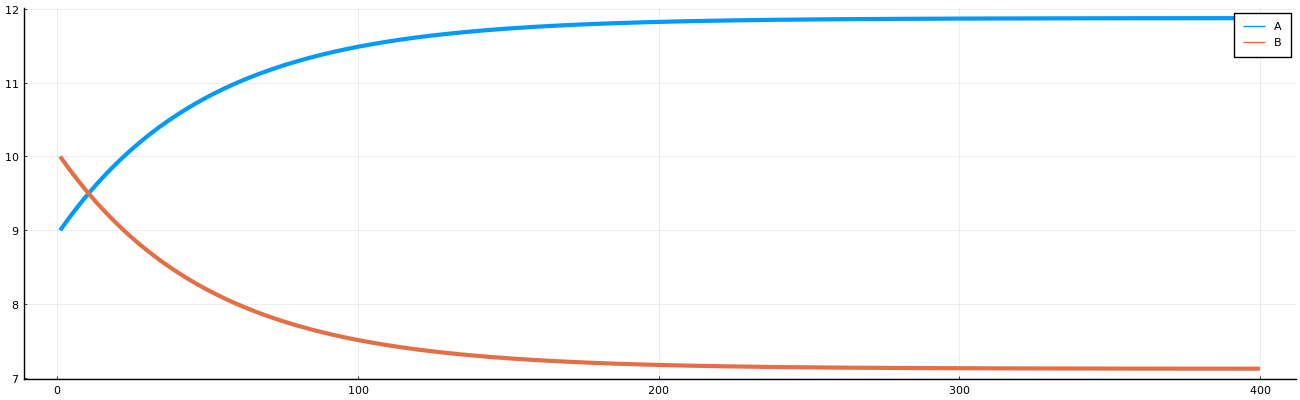

In [3]:
using LinearAlgebra
using Plots
P = [0.9925 0.0125;0.0075 0.9875]
v = [9;10]
A = []
B = []
for t in 1:400
    push!(A,v[1])
    push!(B,v[2])
    v = P*v
end
pyplot()
plot(A,label="A",linewidth=3,size=(1300,400))
plot!(B,label="B",linewidth=3, size=(1300,400))

Să considerăm modelul Usher cu $$P=\left(\begin{array}{cc} 0 & 2 \\ 0.5 & 0.1\end{array}\right).$$ Valorile sale proprii sînt $1,0512$ și $-0,95125$ cu vectorii proprii $$\left(\begin{array}{c} 0,88517 \\ 0,4653 \end{array}\right)$$ și $$\left(\begin{array}{c} 0,9031 \\ -0,4295 \end{array}\right).$$ Deci dacă valoarea inițială este $$\mathbf{x}_0=c_1\left(\begin{array}{c} 0,88517 \\ 0,4653 \end{array}\right)+c_2\left(\begin{array}{c} 0,9031 \\ -0,4295 \end{array}\right),$$ atunci $$\mathbf{x}_t=c_1(1,0512)^t\left(\begin{array}{c} 0,88517 \\ 0,4653 \end{array}\right)+c_2(-0,9512)^t\left(\begin{array}{c} 0,9031 \\ -0,4295 \end{array}\right).$$ Comportamentul pentru două valori inițiale este prezentat în figuri. Se vede că la început avem o comportare oscilantă, apoi valoarea proprie negativă
se duce la $0$ și comportamentul este dominat de valoarea proprie pozitivă și de distribuția stabilă este dată de $\mathbf{e}_1$. Populația crește, dar raportul
celor două componente va fi aproximativ $$\frac{0,88517}{0,4653} \approx 1,9024,$$ adică pentru fiecare adult vom avea $1,9$ indivizi imaturi.

Modelul Leslie pentru care două populații consecutive sînt fertile, adică avem $f_i > 0$ și $f_{i+1}> 0$ va avea o valoare proprie pozitivă strict dominantă și deci o distribuție stabilă de populație. 

In [20]:
using LinearAlgebra
P = [0 2;0.5 0.1]
display(eigvals(P))
display(eigvecs(P))

2-element Vector{Float64}:
 -0.9512492197250394
  1.0512492197250392

2×2 Matrix{Float64}:
 -0.903059  -0.88517
  0.429517  -0.465267

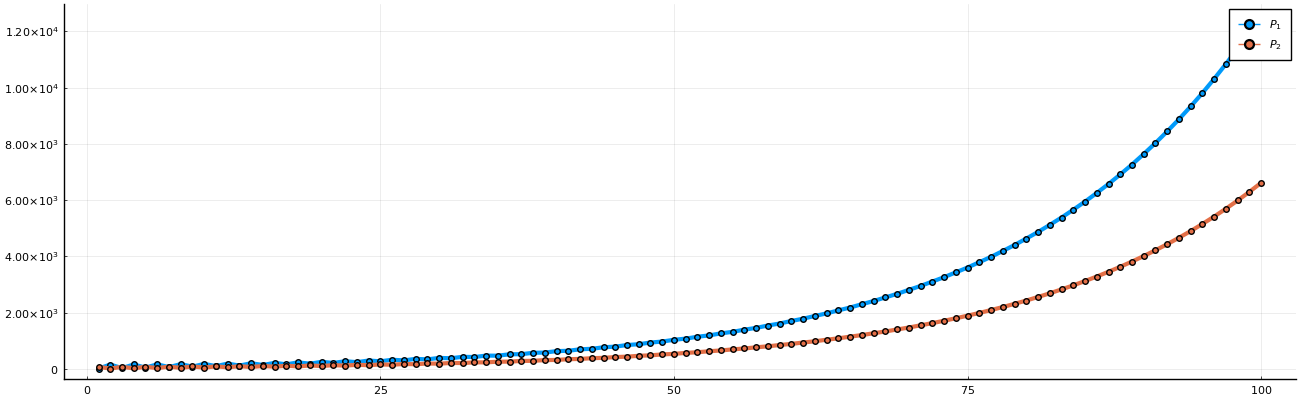

In [5]:
using LinearAlgebra
using Plots
using LaTeXStrings
P = [0 2;0.5 0.1]
v = [20;80]
A = []
B = []
for t in 1:100
    push!(A,v[1])
    push!(B,v[2])
    v = P*v
end
pyplot()
plot(A,label=L"P_1",linewidth=3,markershape = :circle,size=(1300,400))
plot!(B,label=L"P_2",linewidth=3, markershape = :circle,size=(1300,400))

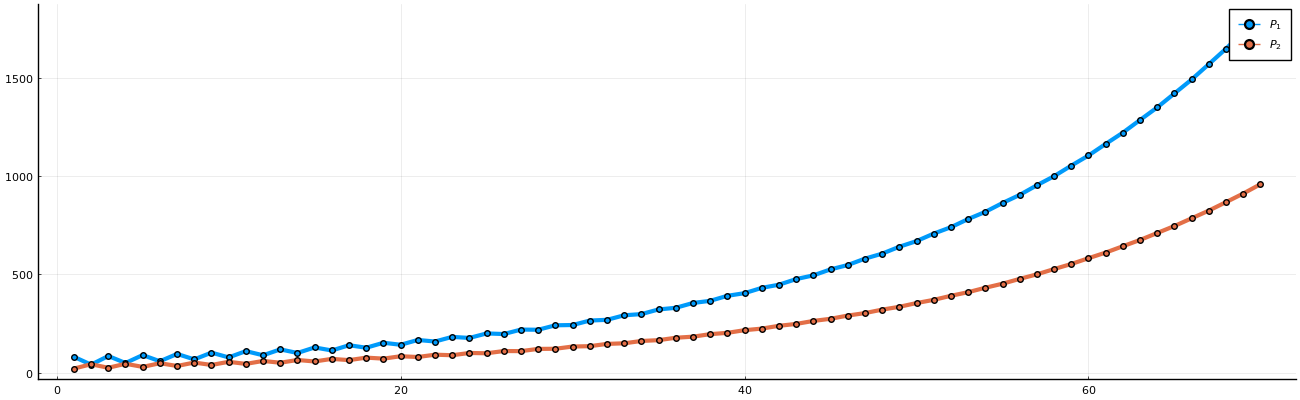

In [27]:
using LinearAlgebra
using Plots
using LaTeXStrings
P = [0 2;0.5 0.1]
v = [80;20]
A = []
B = []
for t in 1:70
    push!(A,v[1])
    push!(B,v[2])
    v = P*v
end
pyplot()
plot(A,label=L"P_1",linewidth=3,markershape = :circle,size=(1300,400))
plot!(B,label=L"P_2",linewidth=3, markershape = :circle,size=(1300,400))

## Cum calculăm valorile și vectorii proprii

Dacă avem o matrice pătratică $A$ trebuie să rezolvă ecuația $A\cdot\mathbf{x}=\lambda\cdot\mathbf{x}$, unde  atît $\lambda$ cît și $\mathbf{x}$ sînt necunoscute.
Trecînd totul în membrul drept obținem că ecuația (de fapt sistemul) $\left(A-\lambda I \right)\cdot\mathbf{x}=0$ trebuie să aibă o soluție nenulă. Prin urmare
matricea $(A-\lambda I)$ nu poate avea inversă. Deci $\det(A-\lambda I)=0$. 

**Definiție** Fie $A$ o matrice de tip $n \times n$. Polinomul de grad $n$ $P(\lambda)=\det(A-\lambda I)$ se numește polinomul caracteristic al lui $A$. 

Rădăcinile sale sînt valorile proprii ale lui $A$. Pentru fiecare astfel de rădăcină $\lambda$ trebuie să rezolvăm sistemul $A\mathbf{x}=\lambda \mathbf{x}$ care 
este un sistem omogen compatibil nedeterminat.

In [8]:
using LinearAlgebra
A=[2 -5 -3;-1 -2 -3;3 15 12]
display(eigvals(A))
display(eigvecs(A))
display(eigen(A))

3-element Vector{Float64}:
 2.999999999999998
 3.0000000000000004
 6.000000000000002

3×3 Matrix{Float64}:
  0.327761   0.977183   -0.301511
  0.437014  -0.210843   -0.301511
 -0.837611   0.0256771   0.904534

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
3-element Vector{Float64}:
 2.999999999999998
 3.0000000000000004
 6.000000000000002
vectors:
3×3 Matrix{Float64}:
  0.327761   0.977183   -0.301511
  0.437014  -0.210843   -0.301511
 -0.837611   0.0256771   0.904534

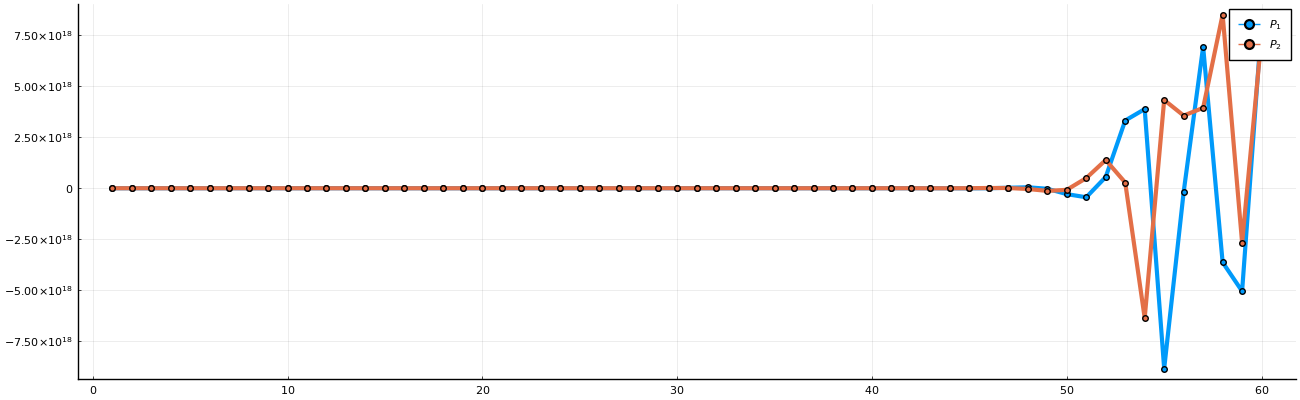

In [13]:
using LinearAlgebra
using Plots
using LaTeXStrings
P = [1 2;-2 1]
v = [1;2]
A = []
B = []
for t in 1:60
    push!(A,v[1])
    push!(B,v[2])
    v = P*v
end
pyplot()
plot(A,label=L"P_1",linewidth=3,markershape = :circle,size=(1300,400))
plot!(B,label=L"P_2",linewidth=3, markershape = :circle,size=(1300,400))